## Content Classification 
## (Entrepreneurship, Science & Technology, Other)

### Import Libraries

In [1]:
#!/usr/bin/python3

import warnings
warnings.filterwarnings('ignore')
import os, pickle, re, string
from string import punctuation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot.metrics as skplt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

### Loading the datasets

In [2]:
df = pd.read_csv("../Datasets/processed_data.csv")
df = df.dropna()
df

,Title,Content,Link,Category
0,تيرتل تري لابز للتقنيات الحيويه تحصل علي تمويل...,جاءت جوله التمويل التمهيديه الاولي للشركه بقيا...,https://ryadiybusiness.com/%d8%aa%d9%8a%d8%b1%...,ريادة أعمال
1,تعد دراسه الجدوي لمشروعك الناشء 6 عوامل اساسيه,تعد دراسه الجدوي متطلبا اساسيا لنجاح اي مشروع ...,https://ryadiybusiness.com/%d9%83%d9%8a%d9%81-...,ريادة أعمال
2,منح جاءزه نوبل الطب لاكتشاف مجال التهاب الكبد ...,وقالت لجنه نوبل للمره الاولي التاريخ يمكن الان...,https://arabic.sputniknews.com/science/2020100...,علوم وتكنولوجيا
3,هيءه الغذاء والدواء الامريكيه لقاح مودرنا حقق ...,نشرت الوكاله وثاءق علي الانترنت اعدها موظفوها ...,https://arabic.sputniknews.com/world/202012151...,علوم وتكنولوجيا
4,حظر بروتين الجهاز المناعي يساعد علي محاربه عدو...,دراسه حديثه قام فريق العلماء جونز هوبكنز ميديس...,https://arabic.rt.com//technology/1161864-%D8%...,علوم وتكنولوجيا
...,...,...,...,...
8394,قواعد اوروبيه تهدد بخفض 10 ايرادات شركات التكن...,قالت وكاله بلومبرغ الاثنين ان كبري شركات التكن...,https://asharq.com/ar/7vNsbHVkd9fTQhBQI70ASx-ق...,علوم وتكنولوجيا
8395,حوار خاص مهندس سعودي نباتك فكره تهدف لزراعه مل...,بدات الفكره نعومه اظفاره عندما كان السابعه عمر...,https://news.un.org/ar/story/2020/09/1062802,أخرى
8396,كريم تطلق خدمه اطلب اي شيء الجديده,اعلنت منصه كريم 4 فبراير الجاري اطلاق خدمه اطل...,https://ryadiybusiness.com/%d9%83%d8%b1%d9%8a%...,ريادة أعمال
8397,تقرير اممي جديد يشير الي تاثير جاءحه فيروس كور...,وفقا لتقديرات المكتب الاممي المعني بالمخدرات و...,https://news.un.org/ar/story/2020/06/1057232,أخرى


In [3]:
df['Category'].value_counts()

علوم وتكنولوجيا    2800
أخرى               2796
ريادة أعمال        2790
Name: Category, dtype: int64

## Modeling (Training & Testing)

In [4]:
# splitting the data into target and feature
Category_lebels = {"أخرى":3 , "علوم وتكنولوجيا":2, "ريادة أعمال":1}
df = df.replace({"Category": Category_lebels})
feature = df.Content
target = df.Category

# splitting into train and tests
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size =.2, random_state=100)

In [5]:
def draw_conf_matrix(model, X_test, Y_test, labels):
    #Creating matplotlib axes object to assign figuresize and figure title
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrx')

    disp = plot_confusion_matrix(model, X_test, Y_test, display_labels= labels, ax = ax)
    disp.confusion_matrix

Accuracy score is 0.99
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       535
           2       0.98      0.99      0.98       602
           3       0.99      0.99      0.99       541

    accuracy                           0.99      1678
   macro avg       0.99      0.98      0.99      1678
weighted avg       0.99      0.99      0.99      1678



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

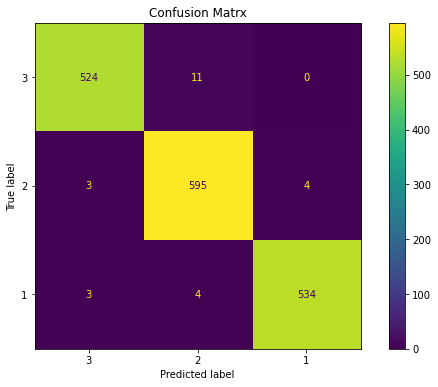

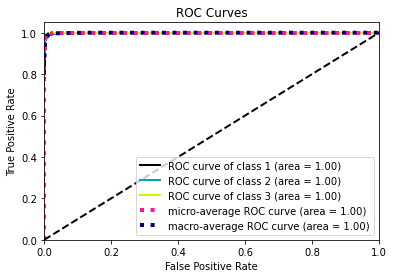

In [6]:
# make pipeline
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
lr = GridSearchCV(pipe, param_grid, cv=5)
lr.fit(X_train,Y_train)

# make prediction and print accuracy
prediction = lr.predict(X_test)
predicted_proba = lr.predict_proba(X_test)

print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))
draw_conf_matrix(lr, X_test, Y_test, Category_lebels.values())
skplt.plot_roc_curve(Y_test, predicted_proba)

Accuracy score is 0.98
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       535
           2       0.98      0.96      0.97       602
           3       0.99      0.99      0.99       541

    accuracy                           0.98      1678
   macro avg       0.98      0.98      0.98      1678
weighted avg       0.98      0.98      0.98      1678



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

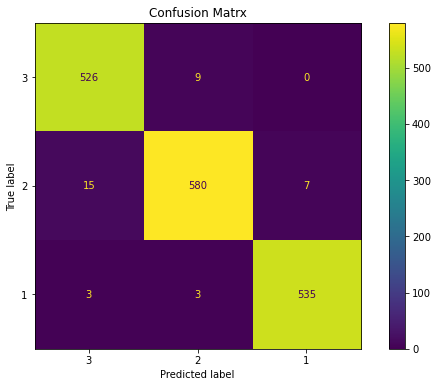

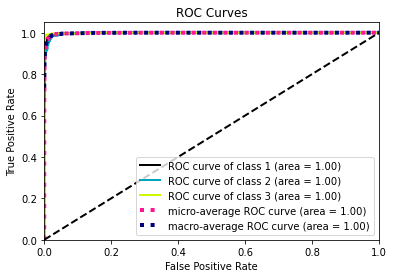

In [7]:
pipe = make_pipeline(TfidfVectorizer(),
                     RandomForestClassifier())

param_grid = {'randomforestclassifier__n_estimators':[10, 100, 1000],
              'randomforestclassifier__max_features':['sqrt', 'log2']}

rf = GridSearchCV(pipe, param_grid, cv=5)
rf.fit(X_train,Y_train)

prediction = rf.predict(X_test)
predicted_proba = rf.predict_proba(X_test)

print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))
draw_conf_matrix(rf, X_test, Y_test, Category_lebels.values())
skplt.plot_roc_curve(Y_test, predicted_proba)

Accuracy score is 0.99
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       535
           2       0.98      0.99      0.98       602
           3       0.99      0.99      0.99       541

    accuracy                           0.99      1678
   macro avg       0.99      0.99      0.99      1678
weighted avg       0.99      0.99      0.99      1678



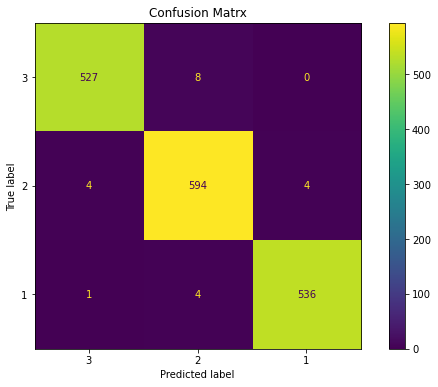

In [9]:
pipe = make_pipeline(TfidfVectorizer(), SVC())
param_grid = {'svc__kernel': ['rbf', 'linear', 'poly'],
              'svc__gamma': [0.1, 1, 10, 100],
              'svc__C': [0.1, 1, 10, 100]}

svc = GridSearchCV(pipe, param_grid, cv=3)
svc.fit(X_train, Y_train)

prediction = svc.predict(X_test)
#predicted_proba = svc.predict_proba(X_test)

print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))
draw_conf_matrix(svc, X_test, Y_test, Category_lebels.values())
#skplt.plot_roc_curve(Y_test, predicted_proba)


accuracy 0.9827175208581644

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       535
           2       0.97      0.99      0.98       602
           3       1.00      0.99      0.99       541

    accuracy                           0.98      1678
   macro avg       0.98      0.98      0.98      1678
weighted avg       0.98      0.98      0.98      1678



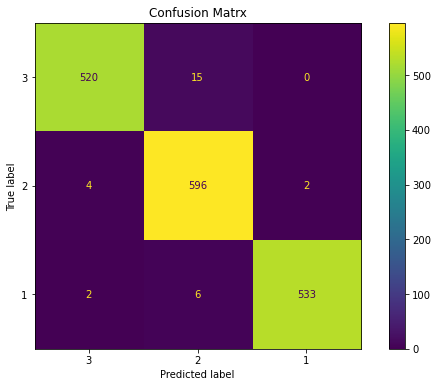

In [12]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, Y_train)
y_pred = sgd.predict(X_test)
#predicted_proba = sgd.predict_proba(X_test)

print('\naccuracy %s\n' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))
draw_conf_matrix(sgd, X_test, Y_test, Category_lebels.values())
#skplt.plot_roc_curve(Y_test, predicted_proba)

In [ ]:
df['Content'][3000] = df['Content'].apply(preprocess)[3000]
out = lr.predict([df['Content'][3000]])
list(Category_lebels.keys())[list(Category_lebels.values()).index(out[0])]

In [ ]:
df['Content'][3000] = df['Content'].apply(preprocess)[3000]
out = ef.predict([df['Content'][3000]])
list(Category_lebels.keys())[list(Category_lebels.values()).index(out[0])]

In [ ]:
df['Content'][3000] = df['Content'].apply(preprocess)[3000]
out = svc.predict([df['Content'][3000]])
list(Category_lebels.keys())[list(Category_lebels.values()).index(out[0])]

In [ ]:
df['Content'][3000] = df['Content'].apply(preprocess)[3000]
out = sgd.predict([df['Content'][3000]])
list(Category_lebels.keys())[list(Category_lebels.values()).index(out[0])]